# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wailua homesteads
Processing Record 2 of Set 1 | rundu
Processing Record 3 of Set 1 | ketchikan
Processing Record 4 of Set 1 | kapuskasing
Processing Record 5 of Set 1 | pikalevo
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | aioun
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | hasaki
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | mili
Processing Record 15 of Set 1 | quibor
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | bartolome maso
City not found. Skipping...
Processing Record 18 of Set 1 | loen
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | lerwick
Processing Record 21 of Set 1 | hotan
Processing Record 22 of Set 1 | a

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,26.74,87,75,5.14,US,1730857770
1,rundu,-17.9333,19.7667,21.52,63,100,3.13,NA,1730857826
2,ketchikan,55.3422,-131.6461,7.99,87,100,8.23,US,1730857828
3,kapuskasing,49.4169,-82.4331,5.05,93,100,3.60,CA,1730857738
4,pikalevo,59.5183,34.1664,-0.65,95,100,1.81,RU,1730857830


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("D:/Github Repositories/python-api-challenge/output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("D:/Github Repositories/python-api-challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,26.74,87,75,5.14,US,1730857770
1,rundu,-17.9333,19.7667,21.52,63,100,3.13,NaN,1730857826
2,ketchikan,55.3422,-131.6461,7.99,87,100,8.23,US,1730857828
3,kapuskasing,49.4169,-82.4331,5.05,93,100,3.60,CA,1730857738
4,pikalevo,59.5183,34.1664,-0.65,95,100,1.81,RU,1730857830


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

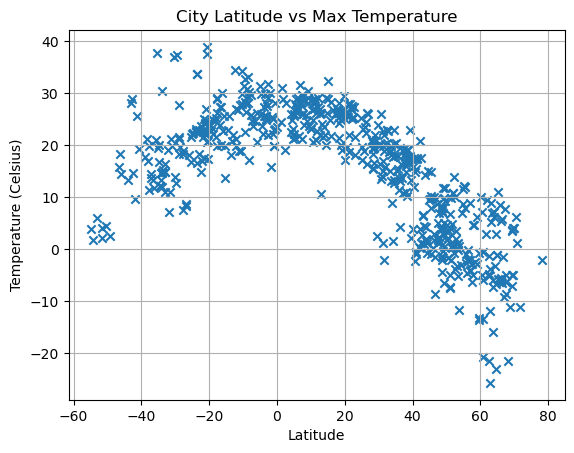

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'x')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("D:/Github Repositories/python-api-challenge/output_data/Fig1a.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

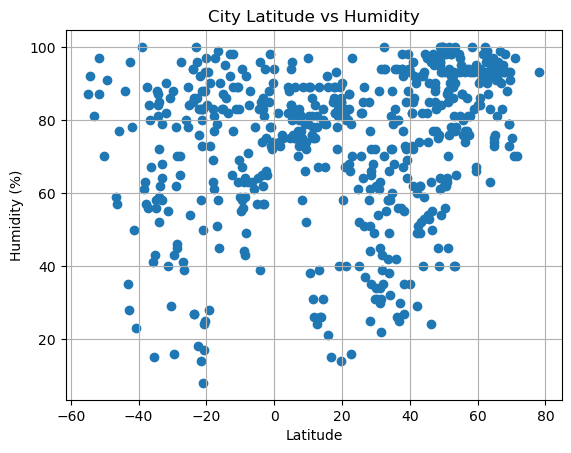

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o')


# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("D:/Github Repositories/python-api-challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

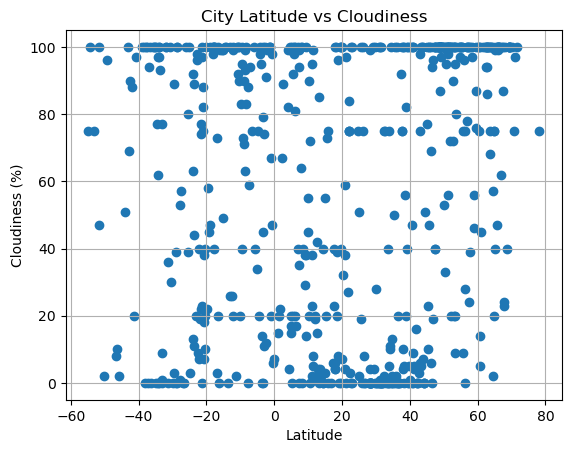

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("D:/Github Repositories/python-api-challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

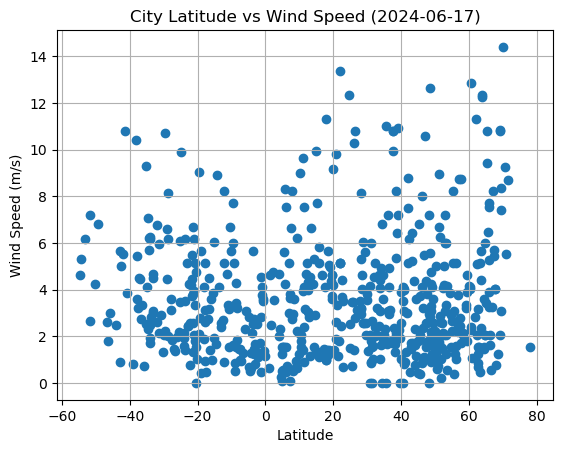

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2024-06-17)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("D:/Github Repositories/python-api-challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is:-0.6391225811379775


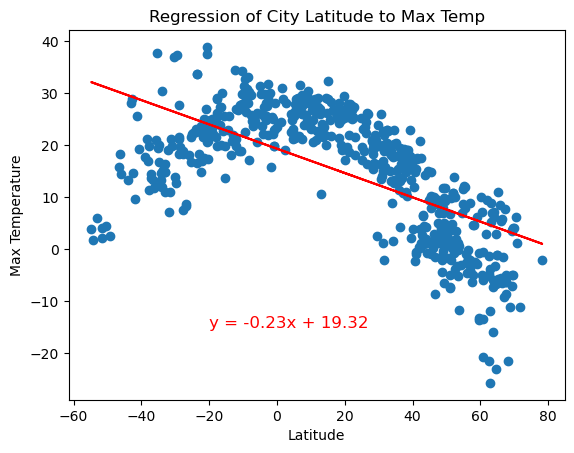

In [38]:
# Define a function to create Linear Regression plots
# Regression for Latitude to Max Temp
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,-15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title("Regression of City Latitude to Max Temp")
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.220872810704521


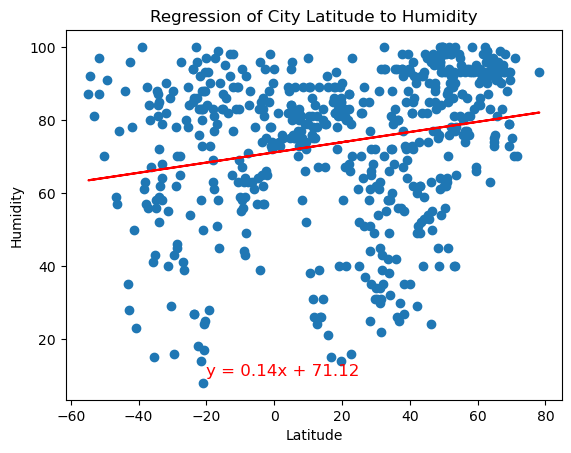

In [39]:
# Define a function to create Linear Regression plots
# Regression for Latitude to Humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Regression of City Latitude to Humidity")
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.12405985789879045


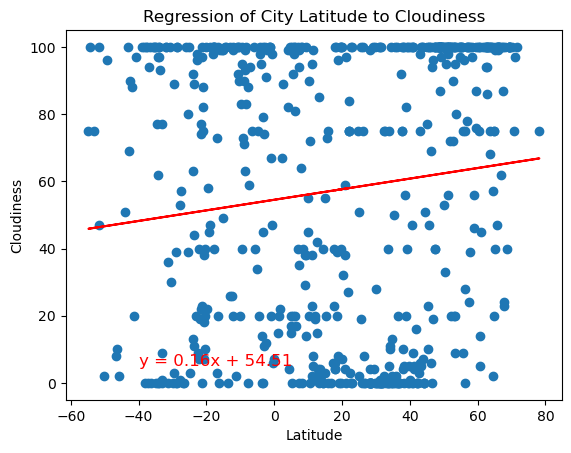

In [41]:
# Define a function to create Linear Regression plots
# Regression for Latitude to Cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,5),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Regression of City Latitude to Cloudiness")
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.0405706428373729


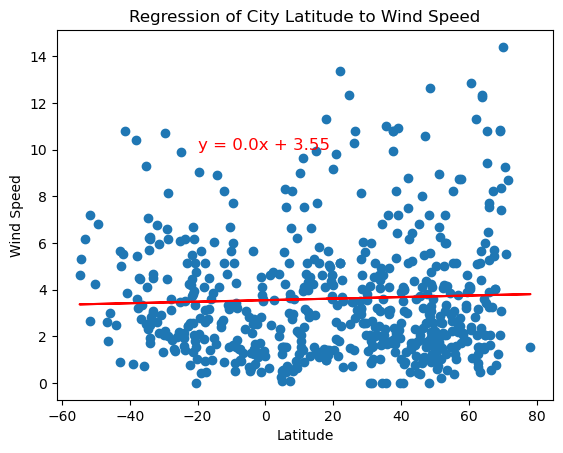

In [45]:
# Define a function to create Linear Regression plots
# Regression for Latitude to Wind Speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Regression of City Latitude to Wind Speed")
print(f"The r-value is:{rvalue}")
plt.show()

In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,26.74,87,75,5.14,US,1730857770
2,ketchikan,55.3422,-131.6461,7.99,87,100,8.23,US,1730857828
3,kapuskasing,49.4169,-82.4331,5.05,93,100,3.60,CA,1730857738
4,pikalevo,59.5183,34.1664,-0.65,95,100,1.81,RU,1730857830
6,aioun,16.6614,-9.6149,26.79,15,0,4.63,MR,1730857832


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rundu,-17.9333,19.7667,21.52,63,100,3.13,NaN,1730857826
5,waitangi,-43.9535,-176.5597,13.32,88,51,2.47,NZ,1730857724
7,edinburgh of the seven seas,-37.0676,-12.3116,14.44,84,94,4.47,SH,1730857750
8,new norfolk,-42.7826,147.0587,28.84,28,69,5.64,AU,1730857834
11,port-aux-francais,-49.3500,70.2167,2.49,91,96,6.81,TF,1730857722


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is:-0.8628671967155754


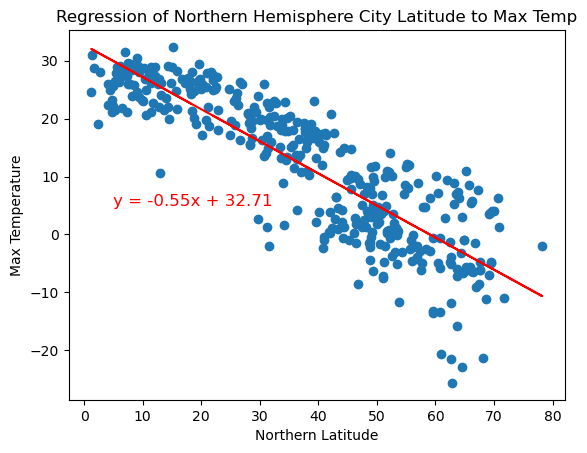

In [57]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,5),fontsize=12,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Max Temperature')
plt.title("Regression of Northern Hemisphere City Latitude to Max Temp")
print(f"The r^2-value is:{rvalue}")
plt.show()

The r^2-value is:0.5996743803807075


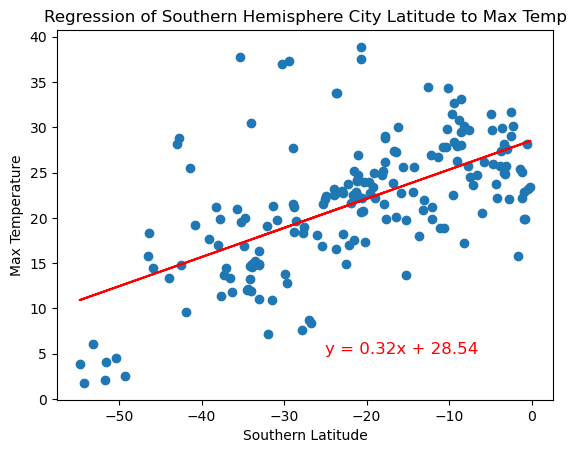

In [58]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,5),fontsize=12,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Max Temperature')
plt.title("Regression of Southern Hemisphere City Latitude to Max Temp")
print(f"The r^2-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** Both the Northern and Southern Hemispheric cities appear to have a relationship between Latitude of the city and the temperatures experienced in the cities in both regions. However, the relationships are inverse to each other. More specifically, as cities in the Southern Latitude reach further north they are more strongly related to higher temperatures (r2 = 0.599) and the cities in the Northern Latitude experience higher temperatures as they reach further south (-0.862).  This is consistent with what one might expect of temperatures if they understand that extremes of nothern or southern latitude brings cities closer to the poles and lower temperatures, while cities closer to the equator would experience warmer temperatures. 

Interestingly, the cities in the sample from the Northern Hemisphere experiences higher temperatures as they head further south, as opposed to the cities in the Southern Hemisphere as they head further notrth. However, one interpretation of this difference would be to remember that the Southern and Northern Hemispheres experience opposing seasonal cylces, so as the Northern Hemisphere is heading into the Winter and a experiencing a greater disparity from the lowest temperatures in the furthest northern cities from the ones reaching closer to the equator, the Southern cities will be experiencing warmer range sof temperature and may not result in as wide a variancein temperatures. Alternatively, there might be a wider spread from the furthest northern cities to the equator from the furthest southern cities to the equator, meaning there would be greater disparity in the temperature ranges of the north from those cities in the south. This second interpretation is somewhat supported from the visual representation of the clustering of Southern Cities in the upper right position of the graph, while the Northern cities are more densely clustered, despite the greater range in the northern latitude cities.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is:0.2851357993049019


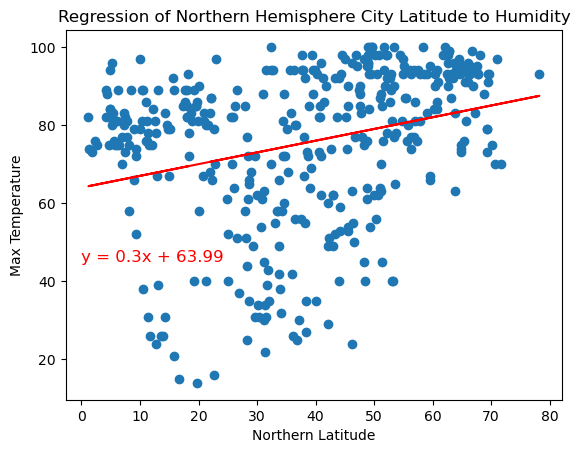

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,45),fontsize=12,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Max Temperature')
plt.title("Regression of Northern Hemisphere City Latitude to Humidity")
print(f"The r^2-value is:{rvalue}")
plt.show()

The r^2-value is:0.10178803651412507


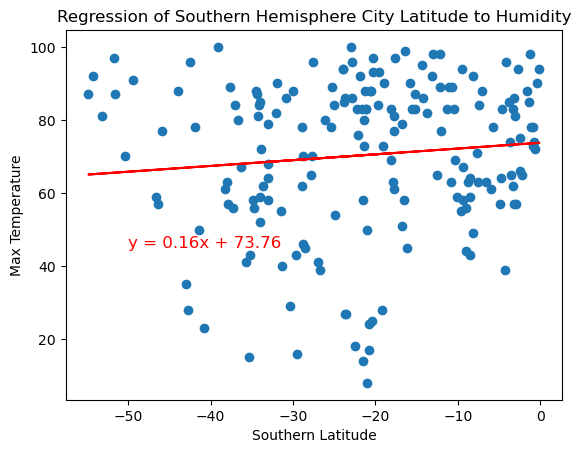

In [96]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,45),fontsize=12,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Max Temperature')
plt.title("Regression of Southern Hemisphere City Latitude to Humidity")
print(f"The r^2-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** The r-value of 0.285 suggests that there is a weak correlation between latitude and Humidity in the Northern hemisphere. The weak to non-existent relationship in the Southern Hemisphere may be due to a smaller sample size or that the Northern Latitude actually experiences greater humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.3806982457104887


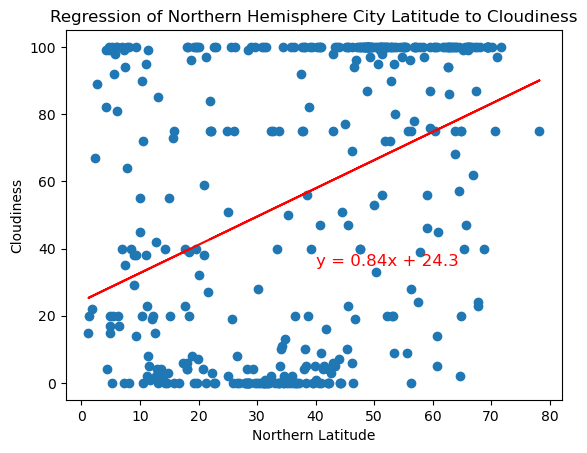

In [75]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,35),fontsize=12,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Cloudiness')
plt.title("Regression of Northern Hemisphere City Latitude to Cloudiness")
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.06347975108210949


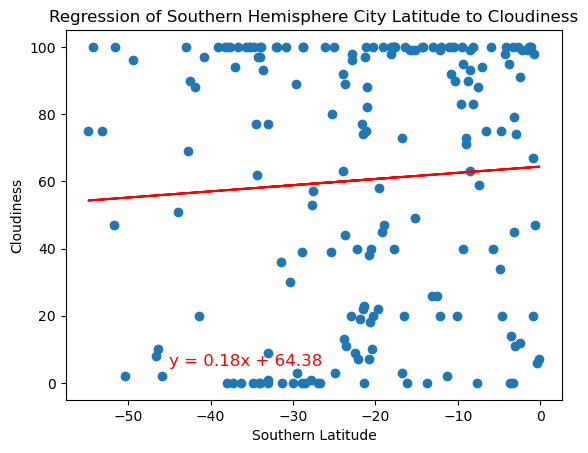

In [95]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45, 5),fontsize=12,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Cloudiness')
plt.title("Regression of Southern Hemisphere City Latitude to Cloudiness")
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** The r-value of 0.380 suggests that there is not a strong positive correlation between latitude and cloudiness in the Northern Hemisphere and none in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.09736569723333896


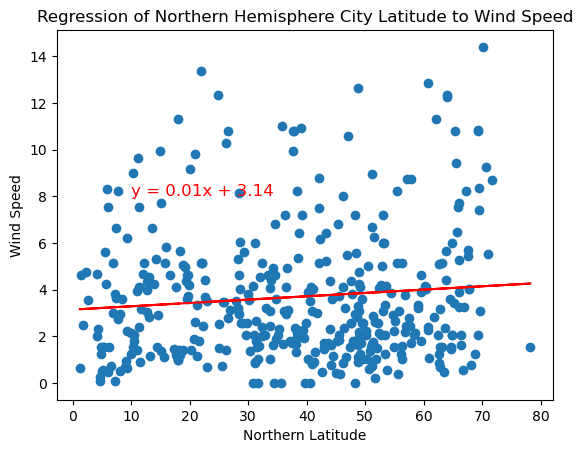

In [90]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,8),fontsize=12,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Wind Speed')
plt.title("Regression of Northern Hemisphere City Latitude to Wind Speed")
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.3189654231967966


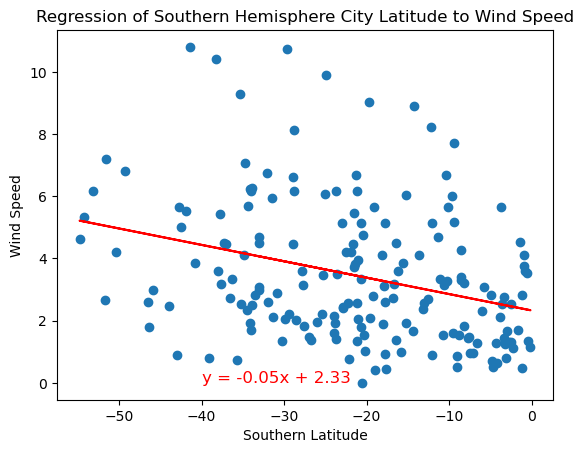

In [94]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,0),fontsize=12,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Wind Speed')
plt.title("Regression of Southern Hemisphere City Latitude to Wind Speed")
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** The r-value of 0.097 suggests that there is little to no correlation between latitude and wind speed in the Northern Hemisphere, while there IS a weak to moderate negative relationship with a r-value of -0.318 in the Southern Hemisphere.